In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization

with open('speaker_data.json', "r") as file:
    data = json.load(file)

X = np.array(data["mfcc"])
y = np.array(data["labels"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0) 

In [2]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [3]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.05, patience=7)

model = Sequential()

model.add(Flatten(input_shape=(X_train.shape[1],X_train.shape[2],1)))

model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(512, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10, activation = "softmax"))

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 65)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               33792     
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               6

In [6]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=60,
                    callbacks=[rlrop],
                    verbose=2)

Epoch 1/60
2110/2110 - 14s - loss: 0.4073 - accuracy: 0.8615 - val_loss: 0.2350 - val_accuracy: 0.9179 - lr: 0.0010
Epoch 2/60
2110/2110 - 14s - loss: 0.2093 - accuracy: 0.9276 - val_loss: 0.1750 - val_accuracy: 0.9432 - lr: 0.0010
Epoch 3/60
2110/2110 - 14s - loss: 0.1715 - accuracy: 0.9418 - val_loss: 0.1396 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 4/60
2110/2110 - 14s - loss: 0.1432 - accuracy: 0.9526 - val_loss: 0.1171 - val_accuracy: 0.9595 - lr: 0.0010
Epoch 5/60
2110/2110 - 15s - loss: 0.1253 - accuracy: 0.9572 - val_loss: 0.1473 - val_accuracy: 0.9512 - lr: 0.0010
Epoch 6/60
2110/2110 - 14s - loss: 0.1132 - accuracy: 0.9616 - val_loss: 1.8636 - val_accuracy: 0.9433 - lr: 0.0010
Epoch 7/60
2110/2110 - 14s - loss: 0.1052 - accuracy: 0.9653 - val_loss: 0.1244 - val_accuracy: 0.9573 - lr: 0.0010
Epoch 8/60
2110/2110 - 14s - loss: 0.0956 - accuracy: 0.9680 - val_loss: 0.0973 - val_accuracy: 0.9685 - lr: 0.0010
Epoch 9/60
2110/2110 - 14s - loss: 0.0896 - accuracy: 0.9705 - val_loss:

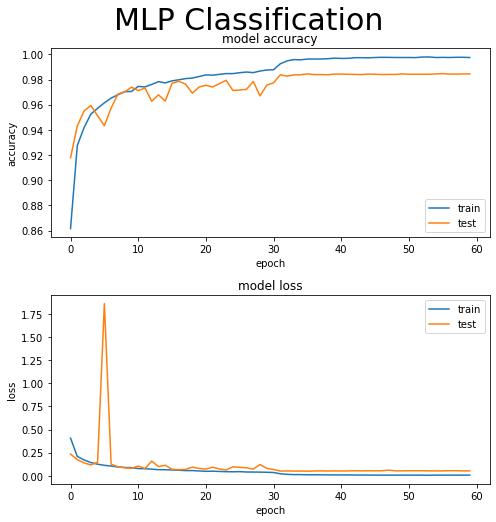

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))


plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('MLP Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.metrics import classification_report
labelNames = ['Jens_Stoltenberg','Margaret_Thatcher','Julia_Gillard','Nelson_Mandela','Benjamin_Netanyahu']
predictions = model.predict(X_test, batch_size=32)

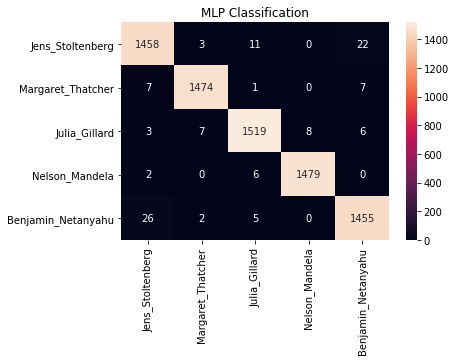

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1))
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames)
plt.title('MLP Classification');

In [1]:
98.45

98.45